## Reference:
https://3months.tistory.com/173  
https://apincan.tistory.com/41?category=860374

In [61]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [62]:
env=gym.make('FrozenLake-v0')

In [63]:
# Q-Table 만들기(0으로 초기화), (number of state, action space)=(16,4)
Q=np.zeros([env.observation_space.n,env.action_space.n])
print(Q.shape)

(16, 4)


# 행동 01. random noise
- 현재 state에서 가능한 action에 따른 Q값에 random noise를 주어서, 이 값이 최대가 되는 action을 선택함.
- Q값에 random noise를 주었기 때문에 무조건 최대 Q를 따르지 않음.
- random noise를 (i+1)로 나누기 때문에 어느 정도 반복 이후 Q값이 수렴 하므로, 탐험 보다는 이용(exploit) 위주

In [26]:
learning_rate=0.8 #큐값 업데이트시 사용
dis=0.99 # discount factor, 감가율
num_episodes=50000 #몇 번 시도? ---> 왜 epoch라고 안하고 에피소드라고 할까..?
reward_list=[] # 에피소드마다 보상의 합 저장하는 리스트

In [27]:
for i in  range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    # 1000번 반복마다 lr 감소시킴 -> 이거 넣으면 정확도가 떨어짐...왜지ㅠ 0.95 같이 크게 해도 10분의 1로 줄어들음
    #if num_episodes%1000==0:
        #learning_rate*=0.1
    
    while not done:
        # action중에 가장 보상이 큰 것 고름. random noise 추가하여 탐험+탐색
        action = np.argmax(Q[state,:] + np.random.randn(1,env.action_space.n)/(i+1))
        
        # 새로운 state, rewrd, done 여부 반환
        new_state, reward, done, _ = env.step(action)
        
        # Q러닝 식
        Q[state, action] = Q[state, action] \
                     + learning_rate*(reward+dis*np.max(Q[new_state,:]-Q[state,action]))
        

        rAll += reward
        state = new_state
    
    reward_list.append(rAll)
    

Score over time: 0.57894
Final Q-Table Values
[[6.55750437e-01 5.84728289e-03 1.78688841e-02 7.53679646e-03]
 [3.12386349e-03 1.65441672e-02 3.90478387e-03 6.83404262e-01]
 [7.92980021e-01 2.65587716e-06 2.30936069e-03 4.10700490e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [6.77021480e-01 1.48506603e-03 0.00000000e+00 3.85538110e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.17673148e-05 9.34190377e-07 5.63622482e-01 9.58428548e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.78652946e-03 3.88821004e-03 6.97682803e-01]
 [0.00000000e+00 8.58323519e-01 0.00000000e+00 0.00000000e+00]
 [4.13851575e-01 0.00000000e+00 2.07533343e-04 1.37986493e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.86241554e-03 9.77730356e-01 7.76844535e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.00758617e+00]
 [0.00000

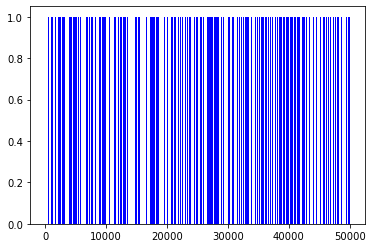

In [28]:
print("Score over time: "+str(sum(reward_list)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(reward_list)),reward_list,color='blue')
plt.show()

# 행동 02. E-greedy
- 어떠한 확률 값 e를 주어 e의 확률로 exploration
> e=0.99 --> 99%확률로 탐험

In [64]:
learning_rate=0.8 #큐값 업데이트시 사용
dis=0.99 # discount factor, 감가율
num_episodes=50000 #몇 번 시도? ---> 왜 epoch라고 안하고 에피소드라고 할까..?
reward_list=[] # 에피소드마다 보상의 합 저장하는 리스트

In [65]:
for i in range(num_episodes) : 
    state = env.reset()
    rAll = 0
    done = False

    # 1000번 반복마다 lr 감소시킴
    if num_episodes%1000==0:
        learning_rate*=0.1
        
    # exploration의 확률 --> 학습이 진행될 수록 입실론 값 감소해야함
    e = 1./((i / 100) + 1)
    
    while not done : 
        
        # E-Greedy 알고리즘
        if np.random.rand(1) > e : #랜덤으로 뽑은 숫자가 입실론보다 클 경우
            action = np.argmax(Q[state, :]) #탐욕정책
            
        else : 
            action = env.action_space.sample() #랜덤하게 행동 결정
        
        # 새로운 state, rewrd, done 여부 반환
        new_state, reward, done, _ = env.step(action)
        
        # Q러닝 식
        Q[state, action] = Q[state, action] \
                     + learning_rate*(reward+dis*np.max(Q[new_state,:]-Q[state,action]))
        
        rAll += reward
        state = new_state
        
    reward_list.append(rAll)


Success rate : 0.02362
Final Q-Table Values
[[4.15044730e-284 2.74225972e-237 5.24375923e-235 2.74225969e-235]
 [2.52038595e-235 3.14768101e-189 3.14768101e-196 3.46563141e-186]
 [3.97434470e-138 7.94868941e-149 3.97434470e-178 3.14768101e-218]
 [3.14768101e-205 3.14771248e-186 2.49296336e-239 3.14768101e-186]
 [4.15044969e-286 0.00000000e+000 4.14629665e-285 2.01588994e-284]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [5.01811200e-097 5.01811200e-096 5.01861381e-201 3.14768101e-191]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [6.33600000e-206 0.00000000e+000 6.33663360e-055 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000]
 [0.00000000e+000 0.00000000e+000 6.33600000e-149 0.00000000e+000]
 [0.00000000e+000 

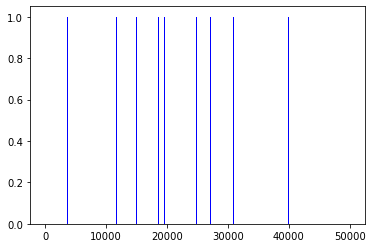

In [66]:
print("Success rate : "+str(sum(reward_list) / num_episodes))
print("Final Q-Table Values")
print(Q)

plt.bar(range(len(reward_list)), reward_list, color="blue")
plt.show()

---
# 질문
- 예상했던 결과는 학습 많이 할 수록 더 정확도 높아질 줄 알았는데 균등하게 보이는 것 같다..
- random noise에서 learning rate를 1000번 당 0.1로 줄여줄 때 정확도가 아주 많이(50분의 1정도...?) 감소하는데 이유는??? 그리고 0.95정도로 작게 줄여도 약간(10분의 1) 줄어든다.
- e-greedy에서는 learning rate를 안 줄일 때 0.01174, 0.95로 줄일 때 0.04208, 0.1로 줄일 때 0.02362 가 나왔다.... 그런데 이거 여러번 리셋하고 다시했는데 결과가 10배 이상 차이남 랜덤때문에 이렇게 많이 차이날 수 있나??